#                PRODUCT CLASSIFICATION
  

Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
from nltk.corpus import wordnet
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
import re
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\SWATHY RAVI\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Reading training data from json and converting into a dataframe by setting index as 'ID'and saving it to a dataframe called 'df'.

In [2]:
train_df = pd.read_json("C:\\Users\\SWATHY RAVI\\Downloads\\train.json",lines=True)
train_df.set_index('ID', inplace=True)
train_df

,Name,Description,CategoryText,URL,lvl1,lvl2,lvl3
ID,,,,,,,
549,Sterling Silver Angel Charm,This little angel charm is just heavenly,All Products,http://www.thecharmworks.com/product/CW-UA/Ste...,64000000_Personal Accessories,64010000_Personal Accessories,64010100_Jewellery
5664,HP Pavilion 23xi 58.40 cm (23�) IPS Monitor,"Share photos, videos, and games with everyone ...",Product,http://store.hp.com/UKStore/Merch/Product.aspx...,65000000_Computing,65010000_Computers/Video Games,65010700_Computer/Video Game Peripherals
3307,East Carolina Pirates Ladies Personalized Bask...,Feel like a bona fide member of East Carolina ...,East Carolina Pirates > East Carolina Pirates ...,http://eastcarolina.teamfanshop.com/COLLEGE_Ea...,67000000_Clothing,67010000_Clothing,67010800_Upper Body Wear/Tops
4609,"Tekonsha 90195 P3 Electric Brake Control, 1-4 ...",Receive free shipping on this item. Enter coup...,Vehicles & Parts > Vehicle Parts & Accessories,http://www.anythingtruck.com/product/755-90195...,77000000_Automotive,77010000_Automotive Accessories and Maintenance,77011200_Automotive Maintenance/Repair
7822,RN-XV WiFly Module - Wire Antenna,Description: The RN-XV module by Roving Networ...,Home :: Wireless ...,http://www.karlssonrobotics.com/cart/rn-xv-wif...,78000000_Electrical Supplies,78050000_Electronic Communication Components,78050100_Electronic Communication Components
...,...,...,...,...,...,...,...
10329,Mens Washington Capitals Reebok Striped Scarf,Get in the game this season with this Washingt...,,http://shop.nhl.com/Men_Mothers_Day,67000000_Clothing,67010000_Clothing,67010100_Clothing Accessories
5191,New York Yankees Ladies Stripe Cami Tank - Nav...,"On those warm weather days, all you want to do...",MLB > New York Yankees > New York Yankees T-Sh...,http://yahoosports.teamfanshop.com/MLB_Basebal...,67000000_Clothing,67010000_Clothing,67010800_Upper Body Wear/Tops
5390,Mens UConn Huskies Navy Blue Arch T-Shirt,Celebrate your fandom with this UConn Huskies ...,UConn Huskies > UConn Huskies T-Shirts,http://shop.uconnhuskies.com/COLLEGE_UCONN_Hus...,67000000_Clothing,67010000_Clothing,67010800_Upper Body Wear/Tops


In [3]:
type(train_df['Name'])

pandas.core.series.Series

# EXPLORATORY DATA ANALYSIS 

Structured Based Data Exploration

In [4]:
#displaying first 5 rows
train_df.head(5)

,Name,Description,CategoryText,URL,lvl1,lvl2,lvl3
ID,,,,,,,
549,Sterling Silver Angel Charm,This little angel charm is just heavenly,All Products,http://www.thecharmworks.com/product/CW-UA/Ste...,64000000_Personal Accessories,64010000_Personal Accessories,64010100_Jewellery
5664,HP Pavilion 23xi 58.40 cm (23�) IPS Monitor,"Share photos, videos, and games with everyone ...",Product,http://store.hp.com/UKStore/Merch/Product.aspx...,65000000_Computing,65010000_Computers/Video Games,65010700_Computer/Video Game Peripherals
3307,East Carolina Pirates Ladies Personalized Bask...,Feel like a bona fide member of East Carolina ...,East Carolina Pirates > East Carolina Pirates ...,http://eastcarolina.teamfanshop.com/COLLEGE_Ea...,67000000_Clothing,67010000_Clothing,67010800_Upper Body Wear/Tops
4609,"Tekonsha 90195 P3 Electric Brake Control, 1-4 ...",Receive free shipping on this item. Enter coup...,Vehicles & Parts > Vehicle Parts & Accessories,http://www.anythingtruck.com/product/755-90195...,77000000_Automotive,77010000_Automotive Accessories and Maintenance,77011200_Automotive Maintenance/Repair
7822,RN-XV WiFly Module - Wire Antenna,Description: The RN-XV module by Roving Networ...,Home :: Wireless ...,http://www.karlssonrobotics.com/cart/rn-xv-wif...,78000000_Electrical Supplies,78050000_Electronic Communication Components,78050100_Electronic Communication Components


In [5]:
#checking the type of the column 
type(train_df.Name)

pandas.core.series.Series

In [6]:
#Display the Number of Variables/rows & Number of Observations/columns
train_df.shape

(10012, 7)

In [7]:
#displaying the variables/cloumn names with their datatypes.
train_df.dtypes

Name            object
Description     object
CategoryText    object
URL             object
lvl1            object
lvl2            object
lvl3            object
dtype: object

In [8]:
#count of non missing values 
train_df.count()

Name            10012
Description     10012
CategoryText    10012
URL             10012
lvl1            10012
lvl2            10012
lvl3            10012
dtype: int64

In [9]:
#finding null values 
train_df.isnull().sum()

Name            0
Description     0
CategoryText    0
URL             0
lvl1            0
lvl2            0
lvl3            0
dtype: int64

Descriptive statstics 

In [10]:
#characteristics of the dataset- summary of data set

''' Count-> no of non missing values,
    unique->no of unique values ,
    top-> most frequent value, 
    freq-> frequency of most frequent values)
'''
train_df.describe()

,Name,Description,CategoryText,URL,lvl1,lvl2,lvl3
count,10012,10012,10012,10012,10012,10012,10012
unique,9826,9081,4596,7903,37,76,281
top,Royal Greens Ultra -,,,http://shop.uicflames.com/uic_flames_T-Shirts,67000000_Clothing,67010000_Clothing,67010800_Upper Body Wear/Tops
freq,7,465,1257,19,4384,4384,3228


In [11]:
#displaying metadata of the dataset.
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10012 entries, 549 to 7270
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          10012 non-null  object
 1   Description   10012 non-null  object
 2   CategoryText  10012 non-null  object
 3   URL           10012 non-null  object
 4   lvl1          10012 non-null  object
 5   lvl2          10012 non-null  object
 6   lvl3          10012 non-null  object
dtypes: object(7)
memory usage: 625.8+ KB


Content based Exploratory data analysis 

In [12]:
train_df.duplicated().sum()

34

In [13]:
train_df.duplicated(keep="first").value_counts()

False    9978
True       34
dtype: int64

In [14]:
train_df.drop_duplicates(keep="first",inplace=True)

In [15]:
train_df.duplicated().sum()

0

In [16]:
#finiding the count of categories available 
category_unique = train_df.CategoryText.unique()
category_unique

array(['All Products', 'Product',
       'East Carolina Pirates > East Carolina Pirates Ladies > East Carolina Pirates Ladies Long Sleeve',
       ..., 'Cartomizers', 'Handles',
       'MLB > New York Yankees > New York Yankees T-Shirts > New York Yankees T-Shirts Tank Tops'],
      dtype=object)

In [17]:
category_unique_df = pd.DataFrame(category_unique)
category_txt_count = category_unique_df[0].value_counts()
category_txt_count

                                                                                                                                                                                                                                          1
Sale Items > Womens > Mens > Womens Ski Helmets > Mens Ski Helmets & Mens Snowboard Helmets > Mens Sale > Mens Equipment Sale > Mens Other Sale > Giro > Giro Ski & Snow Helmets > Mens Giro Ski Helmets & Mens Giro Snowboard Helmets    1
MLB > Detroit Tigers > less than $10                                                                                                                                                                                                      1
CBS > Marquette Golden Eagles > less than $10                                                                                                                                                                                             1
Outdoor IP Cameras                                      

In [18]:
train_df['CategoryText'].nunique()

4596

Selects the first 10 most-frequently occurring levels from the last Series, created by .value_counts(). 
This results in yet another Series—the one which is finally displayed.

<AxesSubplot:xlabel='categories', ylabel='frequency'>

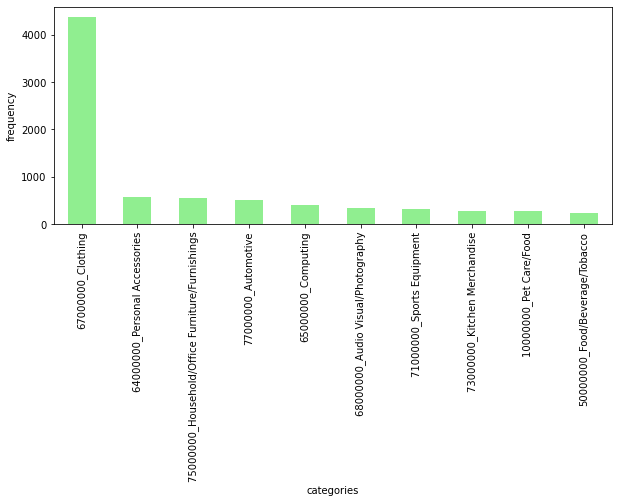

In [19]:
plt.figure(figsize=(10,4))
plt.xlabel("categories")
plt.ylabel("frequency")
train_df.lvl1.value_counts()[:10].plot(kind='bar', color ='lightgreen')

<AxesSubplot:xlabel='categories', ylabel='frequency'>

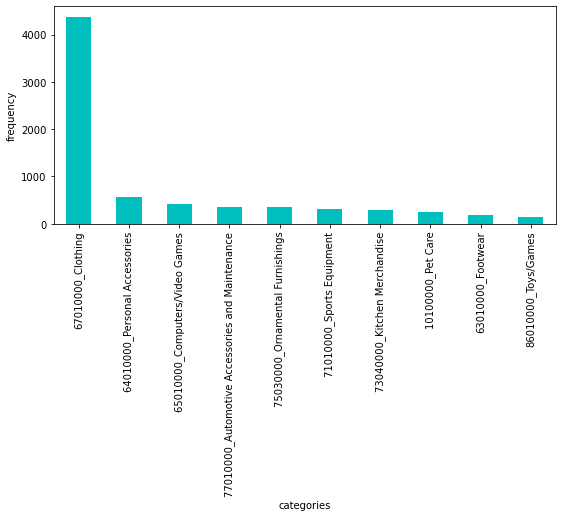

In [20]:
plt.figure(figsize=(9,4))
plt.xlabel("categories")
plt.ylabel("frequency")
train_df.lvl2.value_counts()[:10].plot(kind='bar',color ='c')

<AxesSubplot:xlabel='categories', ylabel='frequency'>

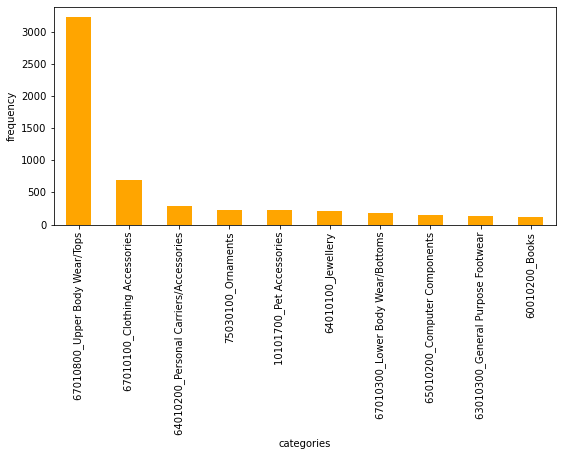

In [21]:
plt.figure(figsize=(9,4))
plt.xlabel("categories")
plt.ylabel("frequency")
train_df.lvl3.value_counts()[:10].plot(kind='bar',color ='orange')

Selects the first 10 most-frequently occurring categorytexts from the last Series, created by .value_counts(). 
This results in yet another Series—the one which is finally displayed.

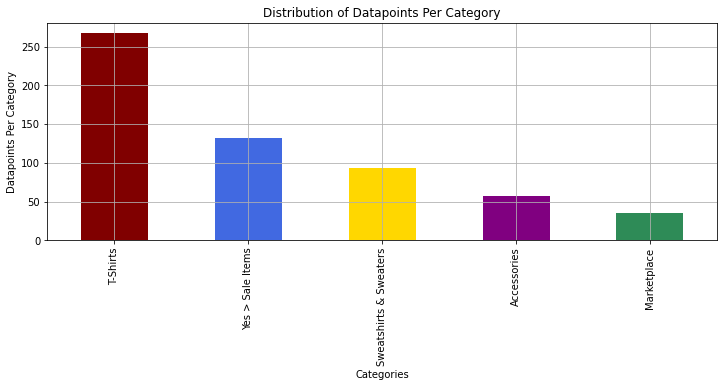

In [22]:
category_dist = train_df['CategoryText'].value_counts()[1:6]
plt.figure(figsize=(12,4))
my_colors = ['maroon', 'royalblue', 'gold', 'purple', 'seagreen']
category_dist.plot(kind='bar', color=my_colors)
plt.grid()
plt.xlabel("Categories")
plt.ylabel("Datapoints Per Category")
plt.title("Distribution of Datapoints Per Category")
plt.show()

# DATA CLEAN AND PRE-PROCESSING

In [23]:
#JOINING NAME AND DESCRIPTION COLUMN sepertaed by:-
train_df["details"] = train_df.Name +" "+ train_df.Description
train_df["details"]

ID
549      Sterling Silver Angel Charm This little angel ...
5664     HP Pavilion 23xi 58.40 cm (23�) IPS Monitor Sh...
3307     East Carolina Pirates Ladies Personalized Bask...
4609     Tekonsha 90195 P3 Electric Brake Control, 1-4 ...
7822     RN-XV WiFly Module - Wire Antenna Description:...
                               ...                        
10329    Mens Washington Capitals Reebok Striped Scarf ...
5191     New York Yankees Ladies Stripe Cami Tank - Nav...
5390     Mens UConn Huskies Navy Blue Arch T-Shirt Cele...
860      Sony Ericsson Xperia Arc S LT18i Product Featu...
7270     Riviera - Toe Ring Our Riviera is a Classy Sap...
Name: details, Length: 9978, dtype: object

In [24]:
#CLEANING the dataset
def specialchr_text(df, text):
    df[text] = df[text].str.replace(r"@"," at ",regex=True)
    df[text] = df[text].str.replace("#[^a-zA-Z0-9_:-]+"," ",regex=True) 
    df[text] = df[text].str.replace(r"[^a-zA-Z(),\"'\n_]"," ",regex=True) 
    df[text] = df[text].str.replace("#!@*&^%$/", " ", regex=True)
    df[text] = df[text].str.lower()
    return df
#specialchr_text(train_df,"details")
#specialchr_text(test_df,"test_details")

In [25]:
#function to remove stopwords 

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

#function to remove emojis
def remove_emoji(string):
    pattern_emoji = re.compile("["
                           u"\U0001F600-\U0001F64F" 
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return pattern_emoji.sub(r'', string)

#function to remove urls 
def remove_urls(text):
    pattern_url = re.compile(r'https?://\S+|www\.\S+')
    return pattern_url.sub(r'', text)

#function to convert to lowercase
def to_lower(text):
    text = text.lower()
    return text

#function to remove html
def remove_html(text):
    return BeautifulSoup(text, "lxml").text

#function extra whitespace removal
def remove_whitespaces(text):
    remove_multiple_whitespaces = lambda text: re.sub('  +', ' ',text)
    return remove_multiple_whitespaces(text)

In [26]:
def clean_levels(df, field):
    df[field] = df[field].str.replace('[^a-zA-Z0-9/>_,]',"",regex=True).str.lower()
    df[field] = df[field].str.lower()
    return df

In [27]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [28]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
wordnet_map = {"N":wordnet.NOUN, "V":wordnet.VERB, "J":wordnet.ADJ, "R":wordnet.ADV} # Pos tag, used Noun, Verb, Adjective and Adverb
# Function for lemmatization using POS tag
def lemmatize_words(text):
    pos_tagged_text = nltk.pos_tag(str(text).split())
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_tagged_text])
# Passing the function to 'text_rare' and store in 'text_lemma'


# Reading Training data & pre-processing using nltk

In [29]:
train_df["details"] = train_df["details"].apply(remove_stopwords)
train_df["details"] = train_df["details"].apply(remove_emoji)
train_df["details"] = train_df["details"].apply(remove_urls)
train_df["details"] = train_df["details"].apply(to_lower)
train_df["details"] = train_df["details"].apply(remove_html)
train_df["details"] = train_df["details"].apply(remove_whitespaces)

In [30]:
train_df["train_details"] = train_df["details"].apply(lemmatize_words)

In [31]:
train_df.drop(['CategoryText','URL','Name','Description','details'], axis=1, inplace=True)

In [32]:
train_df.tail()

,lvl1,lvl2,lvl3,train_details
ID,,,,
10329,67000000_Clothing,67010000_Clothing,67010100_Clothing Accessories,men washington capital reebok strip scarf get ...
5191,67000000_Clothing,67010000_Clothing,67010800_Upper Body Wear/Tops,new york yankee lady stripe cami tank - navy b...
5390,67000000_Clothing,67010000_Clothing,67010800_Upper Body Wear/Tops,men uconn husky navy blue arch t-shirt celebra...
860,66000000_Communications,66010000_Communications,66010300_Mobile Communication Devices/Services,sony ericsson xperia arc s lt18i product featu...
7270,64000000_Personal Accessories,64010000_Personal Accessories,64010100_Jewellery,riviera - toe ring our riviera classy sapphire...


# Reading Test data & pre-processing using nltk

In [33]:
test_df = pd.read_json("C:\\Users\\SWATHY RAVI\\Downloads\\task2_testset_with_labels.json",lines=True)
test_df.set_index('ID', inplace=True)
test_df['test_details']  = test_df.Name+" "+test_df.Description 
test_df['test_details'].head()

ID
15296    Alpinestars Winter Tech Performance Top Produc...
14798    1977 Ford F-100 Ranger XLT Short Bed 351/400 c...
15279    Toronto Blue Jays For Bare Feet Argyle Crew So...
12046    The Vranum Stool The Vranum Stool is made from...
11767    Arkansas Razorbacks Women's Fantasy Fan Tail S...
Name: test_details, dtype: object

In [34]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3107 entries, 15296 to 8982
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Name          3107 non-null   object
 1   Description   3107 non-null   object
 2   CategoryText  3107 non-null   object
 3   URL           3107 non-null   object
 4   lvl1          3107 non-null   object
 5   lvl2          3107 non-null   object
 6   lvl3          3107 non-null   object
 7   test_details  3107 non-null   object
dtypes: object(8)
memory usage: 218.5+ KB


In [35]:
test_df["test_details"] = test_df["test_details"].apply(remove_stopwords)
test_df["test_details"] = test_df["test_details"].apply(remove_emoji)
test_df["test_details"] = test_df["test_details"].apply(remove_urls)
test_df["test_details"] = test_df["test_details"].apply(to_lower)
test_df["test_details"] = test_df["test_details"].apply(remove_html)
test_df["test_details"] = test_df["test_details"].apply(remove_whitespaces)


In [36]:
test_df.drop(['CategoryText','URL','Name','Description'], axis=1, inplace=True)

******input and output variables ********

In [37]:
x_train = train_df['train_details']
y_train = train_df[['lvl1','lvl2','lvl3']]
y_train

,lvl1,lvl2,lvl3
ID,,,
549,64000000_Personal Accessories,64010000_Personal Accessories,64010100_Jewellery
5664,65000000_Computing,65010000_Computers/Video Games,65010700_Computer/Video Game Peripherals
3307,67000000_Clothing,67010000_Clothing,67010800_Upper Body Wear/Tops
4609,77000000_Automotive,77010000_Automotive Accessories and Maintenance,77011200_Automotive Maintenance/Repair
7822,78000000_Electrical Supplies,78050000_Electronic Communication Components,78050100_Electronic Communication Components
...,...,...,...
10329,67000000_Clothing,67010000_Clothing,67010100_Clothing Accessories
5191,67000000_Clothing,67010000_Clothing,67010800_Upper Body Wear/Tops
5390,67000000_Clothing,67010000_Clothing,67010800_Upper Body Wear/Tops


In [38]:
x_test = test_df['test_details']
y_test = test_df[['lvl1','lvl2','lvl3']]

In [39]:
len(x_train)

9978

In [40]:
len(x_test)

3107

In [41]:
len(x_train)

9978

In [42]:
test_df_new = test_df[['lvl1', 'lvl2','lvl3']]
test = [x for i in test_df_new.to_numpy() for x in i]

In [43]:
y_test

,lvl1,lvl2,lvl3
ID,,,
15296,67000000_Clothing,67010000_Clothing,67010800_Upper Body Wear/Tops
14798,77000000_Automotive,77030000_Cars and Motorcycles,77030100_Cars
15279,67000000_Clothing,67010000_Clothing,67010700_Underwear
12046,75000000_Household/Office Furniture/Furnishings,75010000_Household/Office Furniture,75010200_Household/Office Seating
11767,67000000_Clothing,67010000_Clothing,67010100_Clothing Accessories
...,...,...,...
14495,73000000_Kitchen Merchandise,73040000_Kitchen Merchandise,73040200_Water/Beverage Equipment
13235,51000000_Healthcare,51120000_Health Enhancement,51121600_Vitamins/Minerals/Nutritional Supplem...
9561,67000000_Clothing,67010000_Clothing,67010800_Upper Body Wear/Tops


# Reading validation data & pre-processing using nltk

In [44]:
val_df = pd.read_json("C:\\Users\\SWATHY RAVI\\Downloads\\validation.json",lines=True)
val_df['val_details']  = val_df.Name+" "+val_df.Description 
val_df.set_index('ID', inplace=True)

In [45]:
val_df["val_details"] = val_df["val_details"].apply(remove_stopwords)
val_df["val_details"] = val_df["val_details"].apply(remove_emoji)
val_df["val_details"] = val_df["val_details"].apply(remove_urls)
val_df["val_details"] = val_df["val_details"].apply(to_lower)
val_df["val_details"] = val_df["val_details"].apply(remove_html)
val_df["val_details"] = val_df["val_details"].apply(remove_whitespaces)

In [46]:
val_df.drop(['CategoryText','URL','Name','Description'], axis=1, inplace=True)

In [47]:
val_df.duplicated().sum()

22

In [48]:
val_df.drop_duplicates(keep="first",inplace=True)

In [49]:
val_x = val_df['val_details']
val_y = val_df[['lvl1','lvl2','lvl3']]
val_y

,lvl1,lvl2,lvl3
ID,,,
811,51000000_Healthcare,51120000_Health Enhancement,51121600_Vitamins/Minerals/Nutritional Supplem...
5945,64000000_Personal Accessories,64010000_Personal Accessories,64010200_Personal Carriers/Accessories
353,67000000_Clothing,67010000_Clothing,67010800_Upper Body Wear/Tops
3409,67000000_Clothing,67010000_Clothing,67010800_Upper Body Wear/Tops
4900,86000000_Toys/Games,86010000_Toys/Games,86011100_Toy Vehicles � Non-ride
...,...,...,...
7085,67000000_Clothing,67010000_Clothing,67010100_Clothing Accessories
14590,77000000_Automotive,77010000_Automotive Accessories and Maintenance,77012700_Automotive Tyres/Wheels
7556,77000000_Automotive,77010000_Automotive Accessories and Maintenance,77013900_Automotive Lights/Bulbs


# Feature Engineering

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [51]:
# for training data
tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(x_train)
Xtest  = tfidf_vectorizer.transform(x_test)
valtest  = tfidf_vectorizer.transform(val_x)
X_train, Xtest, valtest

(<9978x34266 sparse matrix of type '<class 'numpy.float64'>'
 	with 372723 stored elements in Compressed Sparse Row format>,
 <3107x34266 sparse matrix of type '<class 'numpy.float64'>'
 	with 148520 stored elements in Compressed Sparse Row format>,
 <2978x34266 sparse matrix of type '<class 'numpy.float64'>'
 	with 107263 stored elements in Compressed Sparse Row format>)

In [52]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier
from sklearn.linear_model import LogisticRegression

# LogisticRegression [MultiOutputClassifier ]

In [53]:
model = LogisticRegression(solver='lbfgs',penalty='none',max_iter=100)
classifier_lr = MultiOutputClassifier(model)
print(classifier_lr)

MultiOutputClassifier(estimator=LogisticRegression(penalty='none'))


In [54]:
classifier_lr.fit(X_train,y_train)

C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

MultiOutputClassifier(estimator=LogisticRegression(penalty='none'))

In [55]:
lr_pred = classifier_lr.predict(Xtest)
lr_pred_df = pd.DataFrame(lr_pred)
lr_pred_df.head() 

,0,1,2
0,67000000_Clothing,67010000_Clothing,67010800_Upper Body Wear/Tops
1,77000000_Automotive,77010000_Automotive Accessories and Maintenance,77030100_Cars
2,67000000_Clothing,67010000_Clothing,67010700_Underwear
3,75000000_Household/Office Furniture/Furnishings,75010000_Household/Office Furniture,75010200_Household/Office Seating
4,67000000_Clothing,67010000_Clothing,67010100_Clothing Accessories


In [56]:
lr_pred_col = lr_pred_df [[0, 1,2]]
lr_pred = [x for i in lr_pred_col.to_numpy() for x in i]

In [57]:
#lr.score(Xtest,np.array(y_pred))
print(classification_report(test,lr_pred))

                                                                      precision    recall  f1-score   support

                                              10000000_Pet Care/Food       0.89      0.83      0.86        88
                                                   10100000_Pet Care       0.83      0.87      0.85        82
                                        10101500_Pet Welfare/Hygiene       0.78      0.70      0.74        10
                                10101600_Pet Nutritional Supplements       0.00      0.00      0.00         1
                                            10101700_Pet Accessories       0.70      0.83      0.75        69
                                     10101800_Pet Care Variety Packs       0.00      0.00      0.00         2
                                            10110000_Pet Food/Drinks       1.00      0.50      0.67         6
                                                   10111600_Pet Food       1.00      0.50      0.67         6
         

C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWATHY RAVI\anaconda3\lib\site-packa

# MULTINOMIAL LOGISTIC REGRESSION

In [63]:
mlr_model = LogisticRegression(solver='lbfgs',penalty='none',max_iter=100,multi_class='multinomial')
classifier_mlr = MultiOutputClassifier(mlr_model)
print(classifier_mlr)

MultiOutputClassifier(estimator=LogisticRegression(multi_class='multinomial',
                                                   penalty='none'))


In [64]:
classifier_mlr.fit(X_train,y_train)

C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

MultiOutputClassifier(estimator=LogisticRegression(multi_class='multinomial',
                                                   penalty='none'))

In [65]:
mlr_pred = classifier_mlr.predict(Xtest)
mlr_pred_df = pd.DataFrame(mlr_pred)
mlr_pred_df.head() 

,0,1,2
0,67000000_Clothing,67010000_Clothing,67010800_Upper Body Wear/Tops
1,77000000_Automotive,77010000_Automotive Accessories and Maintenance,77030100_Cars
2,67000000_Clothing,67010000_Clothing,67010700_Underwear
3,75000000_Household/Office Furniture/Furnishings,75010000_Household/Office Furniture,75010200_Household/Office Seating
4,67000000_Clothing,67010000_Clothing,67010100_Clothing Accessories


In [66]:
mlr_pred_col = mlr_pred_df [[0, 1,2]]
mlr_pred = [x for i in mlr_pred_col.to_numpy() for x in i]

In [67]:
#lr.score(Xtest,np.array(y_pred))
print(classification_report(test,mlr_pred))

                                                                      precision    recall  f1-score   support

                                              10000000_Pet Care/Food       0.89      0.83      0.86        88
                                                   10100000_Pet Care       0.83      0.87      0.85        82
                                        10101500_Pet Welfare/Hygiene       0.78      0.70      0.74        10
                                10101600_Pet Nutritional Supplements       0.00      0.00      0.00         1
                                            10101700_Pet Accessories       0.70      0.83      0.75        69
                                     10101800_Pet Care Variety Packs       0.00      0.00      0.00         2
                                            10110000_Pet Food/Drinks       1.00      0.50      0.67         6
                                                   10111600_Pet Food       1.00      0.50      0.67         6
         

C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWATHY RAVI\anaconda3\lib\site-packa

In [159]:
mlr_pred = classifier_mlr.predict(Xtest)
mlr_pred_df = pd.DataFrame(mlr_pred[0])
print("Test input data:\n",x_test.iloc[0])
print("predicted classes are:",list(mlr_pred_df[0]))

Test input data:
 alpinestars winter tech performance top product description alpinestars winter tech performance top automatic translation original description available alpinestars winter tech performance top part alpinestars range base layer underwear developed providing core temperature regulation. dual density layers provide extra moisture wicking keep body comfortablefeatures:- developed cold weather riding conditions double density fabric covering exposed areas.- comfortable moisture wicking material optimal thermal protection.- made polypropylene elastine fabric melt abrasion.- tubular, seamless construction.- compression fit muscle support reduce fatigue.- hypoallergenic bacteriostatic fabric. alpinestars winter tech performance top product corresponds underwear category within mens clothing selection store, motardinn. wait learn advantages belonging community motardinn. what advantages alpinestars winter tech performance top? this product designed specifically provide good su

# Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=60,random_state=180,max_features='sqrt')
classifier_rf = MultiOutputClassifier(estimator=rf_model) 
classifier_rf.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(max_features='sqrt',
                                                       n_estimators=60,
                                                       random_state=180))

In [69]:
rf_pred = classifier_rf.predict(Xtest)
rf_pred_df = pd.DataFrame(rf_pred)

In [70]:
rf_pred_col = rf_pred_df [[0, 1,2]]
rf_pred = [x for i in rf_pred_col.to_numpy() for x in i]

In [71]:
print(classification_report(test,rf_pred))
#to print classification report for level 1
#reference : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
#print(classification_report(y_test.iloc[:,0],lr_df.iloc[:,0]))

                                                                      precision    recall  f1-score   support

                                              10000000_Pet Care/Food       0.75      0.72      0.73        88
                                                   10100000_Pet Care       0.67      0.68      0.68        82
                                        10101500_Pet Welfare/Hygiene       0.45      0.50      0.48        10
                                10101600_Pet Nutritional Supplements       0.00      0.00      0.00         1
                                            10101700_Pet Accessories       0.51      0.71      0.59        69
                                     10101800_Pet Care Variety Packs       0.00      0.00      0.00         2
                                            10110000_Pet Food/Drinks       0.50      0.17      0.25         6
                                                   10111600_Pet Food       0.40      0.33      0.36         6
         

C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWATHY RAVI\anaconda3\lib\site-packa

# Support Vector Classifier

In [72]:
from sklearn.svm import SVC
svc = SVC(gamma="scale", C=1.0, kernel='sigmoid')
classifier_svc = MultiOutputClassifier(estimator=svc)
print(classifier_svc)

MultiOutputClassifier(estimator=SVC(kernel='sigmoid'))


In [73]:
classifier_svc.fit(X_train, y_train)

MultiOutputClassifier(estimator=SVC(kernel='sigmoid'))

In [74]:
classifier_svc.score(X_train, y_train)

0.9050912006414111

In [75]:
svc_pred = classifier_svc.predict(Xtest)
svc_pred_df = pd.DataFrame(svc_pred)

In [76]:
svc_pred_col = svc_pred_df [[0, 1,2]]
svc_pred = [x for i in svc_pred_col.to_numpy() for x in i]

In [77]:
print(classification_report(test,svc_pred))

                                                                      precision    recall  f1-score   support

                                              10000000_Pet Care/Food       0.95      0.85      0.90        88
                                                   10100000_Pet Care       0.85      0.90      0.88        82
                                        10101500_Pet Welfare/Hygiene       0.86      0.60      0.71        10
                                10101600_Pet Nutritional Supplements       0.00      0.00      0.00         1
                                            10101700_Pet Accessories       0.47      0.90      0.62        69
                                     10101800_Pet Care Variety Packs       0.00      0.00      0.00         2
                                            10110000_Pet Food/Drinks       1.00      0.33      0.50         6
                                                   10111600_Pet Food       1.00      0.33      0.50         6
         

C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

In [78]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4,leaf_size = 25)
classifier_knn = MultiOutputClassifier(knn, n_jobs=-1)

In [79]:
classifier_knn.fit(X_train,y_train)

MultiOutputClassifier(estimator=KNeighborsClassifier(leaf_size=25,
                                                     n_neighbors=4),
                      n_jobs=-1)

In [80]:
knn_pred = classifier_knn.predict(Xtest)
knn_pred_df = pd.DataFrame(knn_pred)

In [81]:
knn_pred_col = knn_pred_df [[0, 1,2]]
knn_pred = [x for i in knn_pred_col.to_numpy() for x in i]

In [82]:
print(classification_report(test,knn_pred))

                                                                      precision    recall  f1-score   support

                                              10000000_Pet Care/Food       0.66      0.82      0.73        88
                                                   10100000_Pet Care       0.62      0.80      0.70        82
                                        10101500_Pet Welfare/Hygiene       0.45      0.50      0.48        10
                                10101600_Pet Nutritional Supplements       0.00      0.00      0.00         1
                                            10101700_Pet Accessories       0.54      0.80      0.64        69
                                     10101800_Pet Care Variety Packs       0.00      0.00      0.00         2
                                            10110000_Pet Food/Drinks       0.60      0.50      0.55         6
                                                   10111600_Pet Food       0.50      0.50      0.50         6
         

C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWATHY RAVI\anaconda3\lib\site-packa

# Decision Tree

In [83]:
from sklearn import tree
dt_model = tree.DecisionTreeClassifier(random_state=170, max_depth =278,min_samples_split=20,min_samples_leaf=1)
classifier_dt = MultiOutputClassifier(dt_model)

In [84]:
classifier_dt.fit(X_train,y_train)

MultiOutputClassifier(estimator=DecisionTreeClassifier(max_depth=278,
                                                       min_samples_split=20,
                                                       random_state=170))

In [85]:
dt_pred = classifier_dt.predict(Xtest)
dt_pred_df = pd.DataFrame(dt_pred)
dt_pred_df

,0,1,2
0,67000000_Clothing,67010000_Clothing,75030100_Ornaments
1,77000000_Automotive,67010000_Clothing,67010600_Sportswear
2,67000000_Clothing,71010000_Sports Equipment,75030100_Ornaments
3,63000000_Footwear,75010000_Household/Office Furniture,75010200_Household/Office Seating
4,67000000_Clothing,67010000_Clothing,67010100_Clothing Accessories
...,...,...,...
3102,73000000_Kitchen Merchandise,73040000_Kitchen Merchandise,73040200_Water/Beverage Equipment
3103,51000000_Healthcare,51120000_Health Enhancement,51121600_Vitamins/Minerals/Nutritional Supplem...
3104,67000000_Clothing,71010000_Sports Equipment,67010800_Upper Body Wear/Tops
3105,67000000_Clothing,67010000_Clothing,75030100_Ornaments


In [86]:
dt_pred_col = dt_pred_df [[0, 1,2]]
dt_pred = [x for i in dt_pred_col.to_numpy() for x in i]

In [87]:
print(classification_report(test,dt_pred))

                                                                      precision    recall  f1-score   support

                                              10000000_Pet Care/Food       0.53      0.61      0.57        88
                                                   10100000_Pet Care       0.76      0.59      0.66        82
                                        10101500_Pet Welfare/Hygiene       0.33      0.10      0.15        10
                                10101600_Pet Nutritional Supplements       0.00      0.00      0.00         1
                                            10101700_Pet Accessories       0.75      0.57      0.64        69
                                     10101800_Pet Care Variety Packs       0.00      0.00      0.00         2
                                            10110000_Pet Food/Drinks       0.40      0.33      0.36         6
                                                   10111600_Pet Food       0.67      0.33      0.44         6
         

C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWATHY RAVI\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SWATHY RAVI\anaconda3\lib\site-packa

# VISUALIZATION OF EVALUATION METRICS

In [107]:
#Tabular data of evaluation metrics - weighted avg.
from tabulate import tabulate
metrics_data = [["Weighted-Average ","Precision","Recall","F1 Score"],
            ["MULTINOMIAL LOGISTIC REGRESSION",0.86,0.86,0.85],
            ["LOGISTIC REGRESSION",0.84,0.84,0.83],
            ["DECISION TREE",0.67,0.63,0.64],
            ["RANDOM FOREST",0.69,0.70,0.66],
            ["SUPPORT VECTOR CLASSIFIER",0.80,0.80,0.78],
            ["K NEAREST NEIGHBOR",0.74,0.74,0.72]]

In [108]:
table1 = tabulate(metrics_data)
table2 = tabulate(metrics_data,headers='firstrow')

In [109]:
print(tabulate(metrics_data,headers='firstrow',tablefmt='grid'))

+---------------------------------+-------------+----------+------------+
| Weighted-Average                |   Precision |   Recall |   F1 Score |
+=================================+=============+==========+============+
| MULTINOMIAL LOGISTIC REGRESSION |        0.86 |     0.86 |       0.85 |
+---------------------------------+-------------+----------+------------+
| LOGISTIC REGRESSION             |        0.84 |     0.84 |       0.83 |
+---------------------------------+-------------+----------+------------+
| DECISION TREE                   |        0.67 |     0.63 |       0.64 |
+---------------------------------+-------------+----------+------------+
| RANDOM FOREST                   |        0.69 |     0.7  |       0.66 |
+---------------------------------+-------------+----------+------------+
| SUPPORT VECTOR CLASSIFIER       |        0.8  |     0.8  |       0.78 |
+---------------------------------+-------------+----------+------------+
| K NEAREST NEIGHBOR              |   

In [106]:
#macro average 
macro_avg = [["Macro-Average ","Precision","Recall","F1 Score"],
            ["MULTINOMIAL LOGISTIC REGRESSION",0.63,0.57,0.57],
            ["LOGISTIC REGRESSION",0.59,0.53,0.53],
            ["DECISION TREE",0.33,0.26,0.27],
            ["RANDOM FOREST",0.46,0.32,0.35],
            ["SUPPORT VECTOR CLASSIFIER",0.51,0.38,0.41],
            ["K NEAREST NEIGHBOR",0.48,0.44,0.43]]
table1 = tabulate(macro_avg)
table2 = tabulate(macro_avg,headers='firstrow')
print(tabulate(macro_avg,headers='firstrow',tablefmt='grid'))

+---------------------------------+-------------+----------+------------+
| Macro-Average                   |   Precision |   Recall |   F1 Score |
+=================================+=============+==========+============+
| MULTINOMIAL LOGISTIC REGRESSION |        0.63 |     0.57 |       0.57 |
+---------------------------------+-------------+----------+------------+
| LOGISTIC REGRESSION             |        0.59 |     0.53 |       0.53 |
+---------------------------------+-------------+----------+------------+
| DECISION TREE                   |        0.33 |     0.26 |       0.27 |
+---------------------------------+-------------+----------+------------+
| RANDOM FOREST                   |        0.46 |     0.32 |       0.35 |
+---------------------------------+-------------+----------+------------+
| SUPPORT VECTOR CLASSIFIER       |        0.51 |     0.38 |       0.41 |
+---------------------------------+-------------+----------+------------+
| K NEAREST NEIGHBOR              |   

In [111]:
#accuracy of models 
acc = [["Models","Accuracy"],
            ["MULTINOMIAL LOGISTIC REGRESSION",86],
            ["LOGISTIC REGRESSION",84],
            ["DECISION TREE",64],
            ["RANDOM FOREST",70],
            ["SUPPORT VECTOR CLASSIFIER",80],
            ["K NEAREST NEIGHBOR",74]]
table1 = tabulate(acc)
table2 = tabulate(acc,headers='firstrow')
print(tabulate(acc,headers='firstrow',tablefmt='grid'))

+---------------------------------+------------+
| Models                          |   Accuracy |
+=================================+============+
| MULTINOMIAL LOGISTIC REGRESSION |         86 |
+---------------------------------+------------+
| LOGISTIC REGRESSION             |         84 |
+---------------------------------+------------+
| DECISION TREE                   |         64 |
+---------------------------------+------------+
| RANDOM FOREST                   |         70 |
+---------------------------------+------------+
| SUPPORT VECTOR CLASSIFIER       |         80 |
+---------------------------------+------------+
| K NEAREST NEIGHBOR              |         74 |
+---------------------------------+------------+


In [117]:
#plotting accuracy scores of all models using barplot.
scores = [80,84,70,64,74,86]
algos = ['Support Vector Classifier','Logistic Regression','Random Forest','Decision Tree','K Nearest Neighbor',"Multinomial Logistic Regression"]
xpos = np.arange(len(algos))

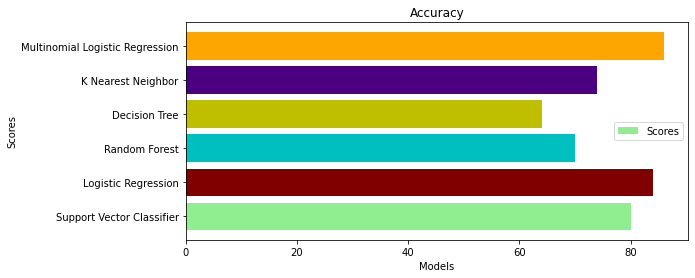

In [118]:
plt.figure(figsize=(9,4))
plt.barh(xpos,scores, label="Scores",color=['lightgreen', 'maroon', 'c',  'y','indigo','orange'])
plt.yticks(xpos,algos)
plt.ylabel("Scores")
plt.xlabel("Models")
plt.title('Accuracy')
plt.legend()

In [123]:
#comparison of validation vs train score
train_score=[90,99,99,12,79,99]
val_score = [72,76,62,4,67,80]
algo = ['SVM','Logistic Regression','Random Forest','Decision Tree','KNN',"MULTINOMIAL LOGISTIC REGRESSION"]
xpos = np.arange(len(algos))

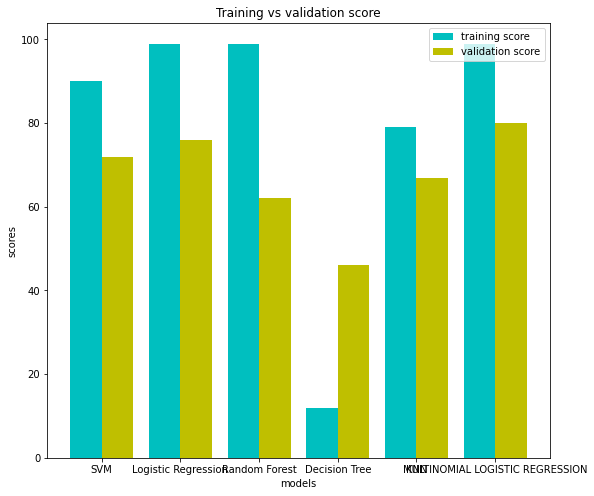

In [133]:
plt.figure(figsize=(9,8))
plt.bar(xpos-0.2,train_score, width=0.4, label="training score", color ='c')
plt.bar(xpos+0.2,val_score, width=0.4,label="validation score",color = 'y')
plt.xticks(xpos,algo)
plt.ylabel("scores")
plt.xlabel("models")
plt.title('Training vs validation score')
plt.legend()

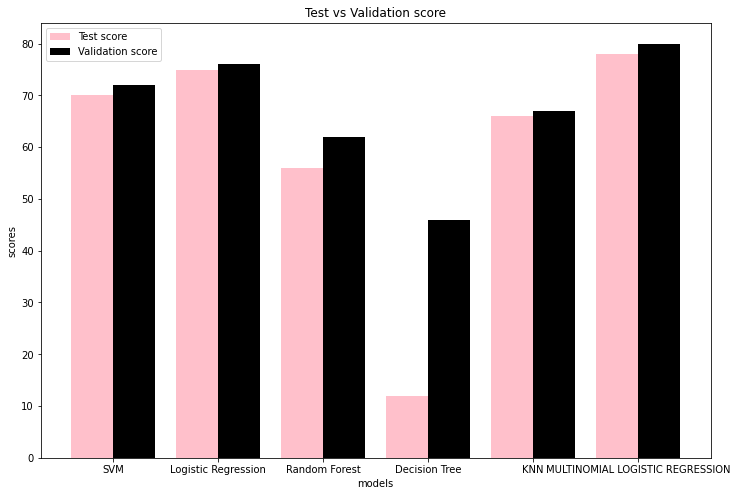

In [125]:
test_score=[70,75,56,12,66,78]
val_score = [72,76,62,46,67,80]
algo = ['SVM','Logistic Regression','Random Forest','Decision Tree','KNN',"MULTINOMIAL LOGISTIC REGRESSION"]
xpos = np.arange(len(algos))
plt.figure(figsize=(12,8))
plt.bar(xpos-0.2,test_score, width=0.4, label="Test score", color ='pink')
plt.bar(xpos+0.2,val_score, width=0.4,label="Validation score",color = 'black')
plt.xticks(xpos,algo)
plt.ylabel("scores")
plt.xlabel("models")
plt.title('Test vs Validation score')
plt.legend()

**CONFUSION MATRIX**

In [126]:
#this_function_plots_the_confusion_matrices_given_y_i_and_y_i_hat_
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(y_test, yhat):

    C = confusion_matrix(y_test, yhat) #confusion_mat
    A =(((C.T)/(C.sum(axis=1))).T) #recall_mat
    B =(C/C.sum(axis=0)) #precision_mat
   # cmap- rocket,mako,YlOrBr
    
    #representing_C_in_heatmap_format
    print("-"*40, "Confusion Matrix", "-"*40)
    plt.figure(figsize=(30,10))
    sns.heatmap(C, annot=True, cmap="mako", fmt=".3f")
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #representing_B_in_heatmap_format
    print("-"*40, "Precision Matrix (Columm Sum=1)", "-"*40)
    plt.figure(figsize=(30,7))
    sns.heatmap(B, annot=True, cmap="rocket", fmt=".3f")
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #representing_A_in_heatmap_format
    print("-"*40, "Recall Matrix (Row Sum=1)", "-"*40)
    plt.figure(figsize=(30,10))
    sns.heatmap(A, annot=True, cmap="YlOrBr", fmt=".3f")
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

*****************DECISION TREE**************
---------------------------------------- Confusion Matrix ----------------------------------------


<ipython-input-126-b800c016b9c1>:7: RuntimeWarning: invalid value encountered in true_divide
  A =(((C.T)/(C.sum(axis=1))).T) #recall_mat
<ipython-input-126-b800c016b9c1>:8: RuntimeWarning: invalid value encountered in true_divide
  B =(C/C.sum(axis=0)) #precision_mat


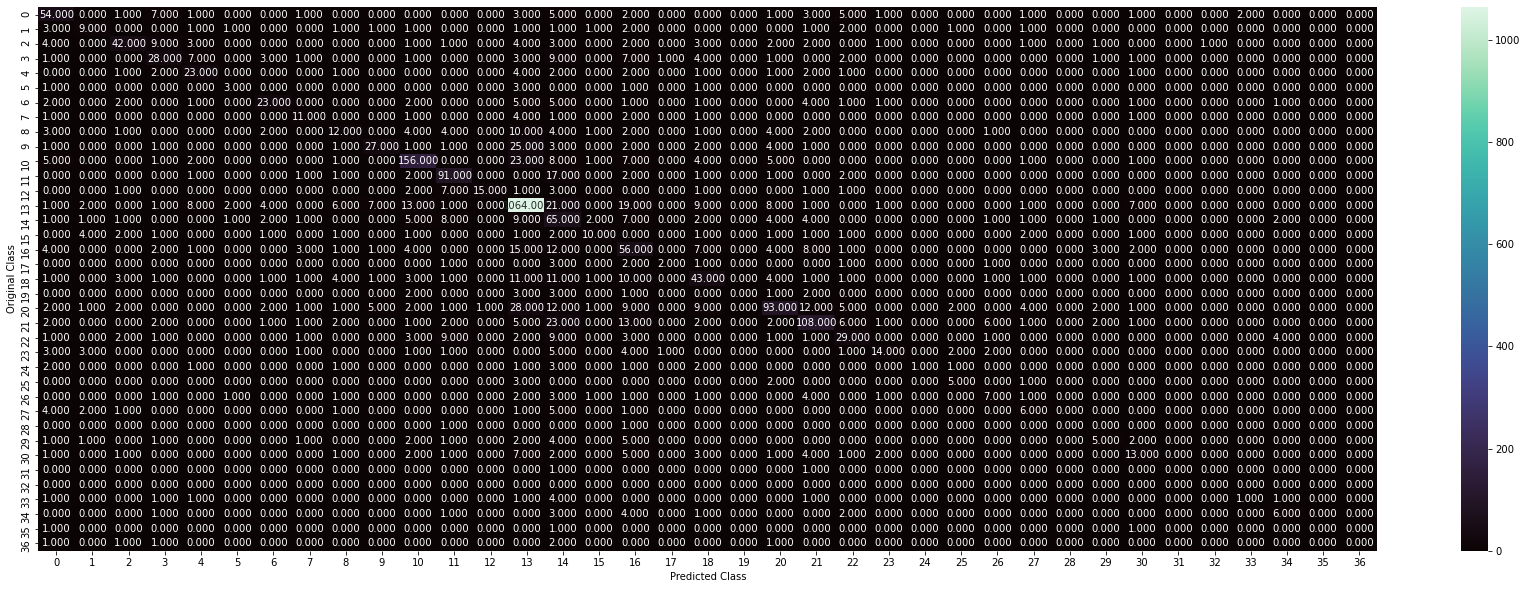

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


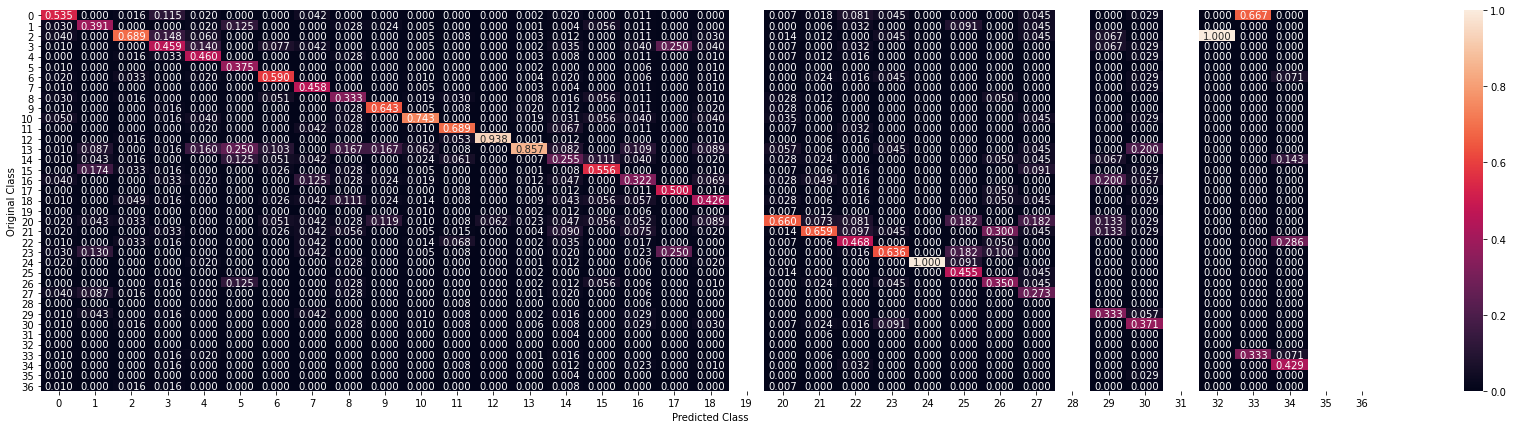

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


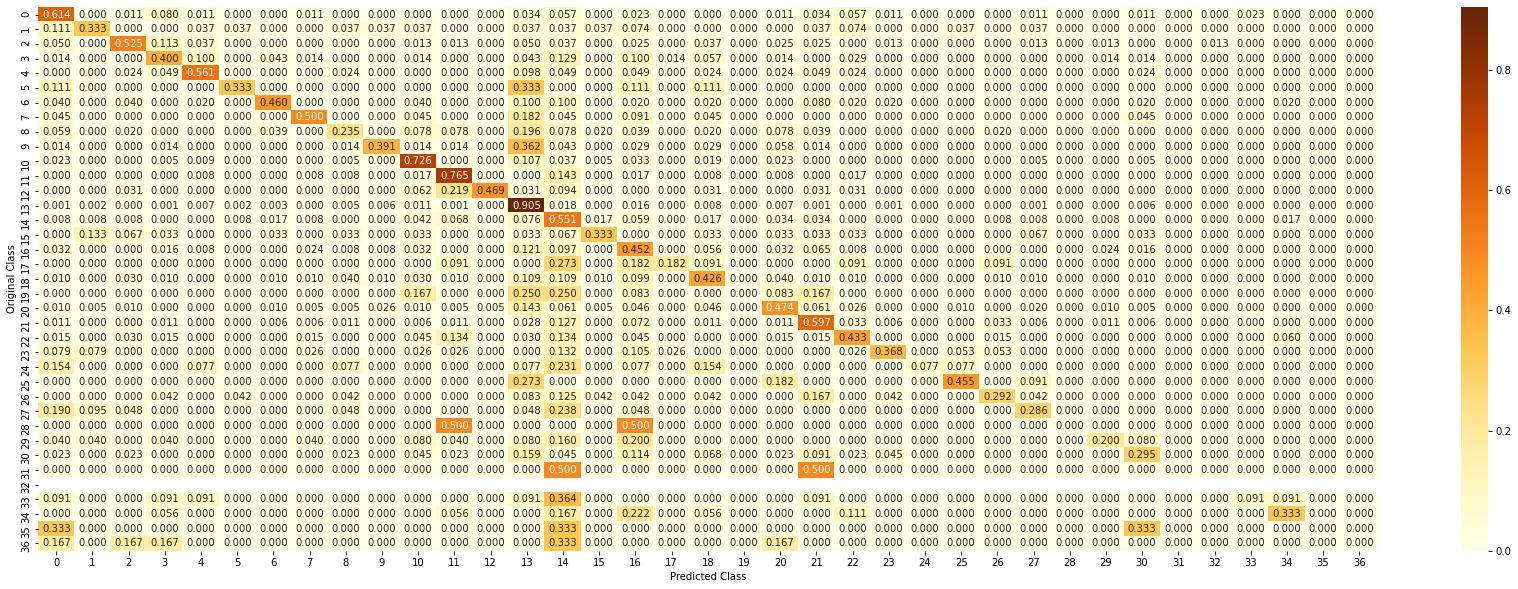

In [127]:
print("*****************DECISION TREE**************")
plot_confusion_matrix(y_test.iloc[:,0],dt_pred_df.iloc[:,0])

*****************RANDOM FOREST**************
---------------------------------------- Confusion Matrix ----------------------------------------


<ipython-input-126-b800c016b9c1>:8: RuntimeWarning: invalid value encountered in true_divide
  B =(C/C.sum(axis=0)) #precision_mat


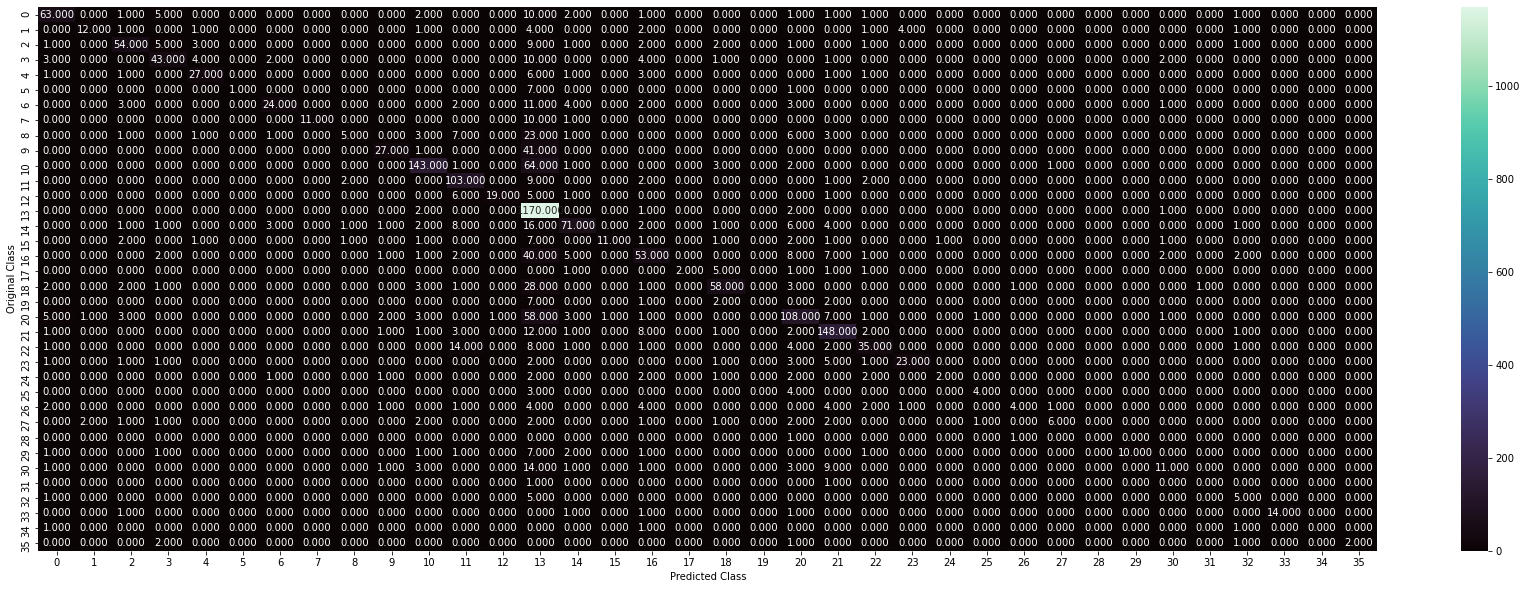

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


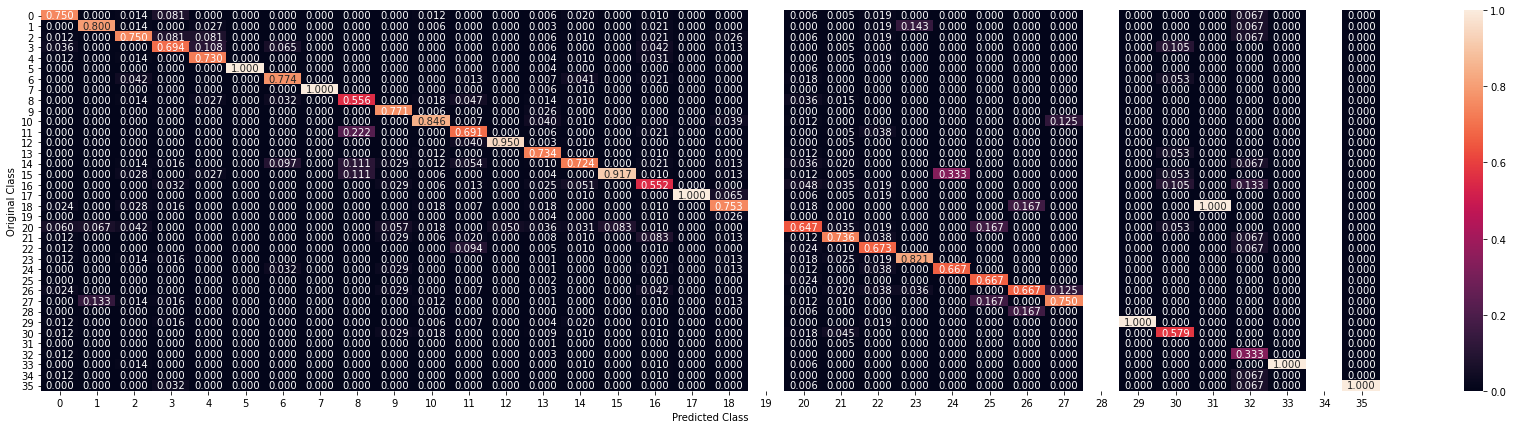

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


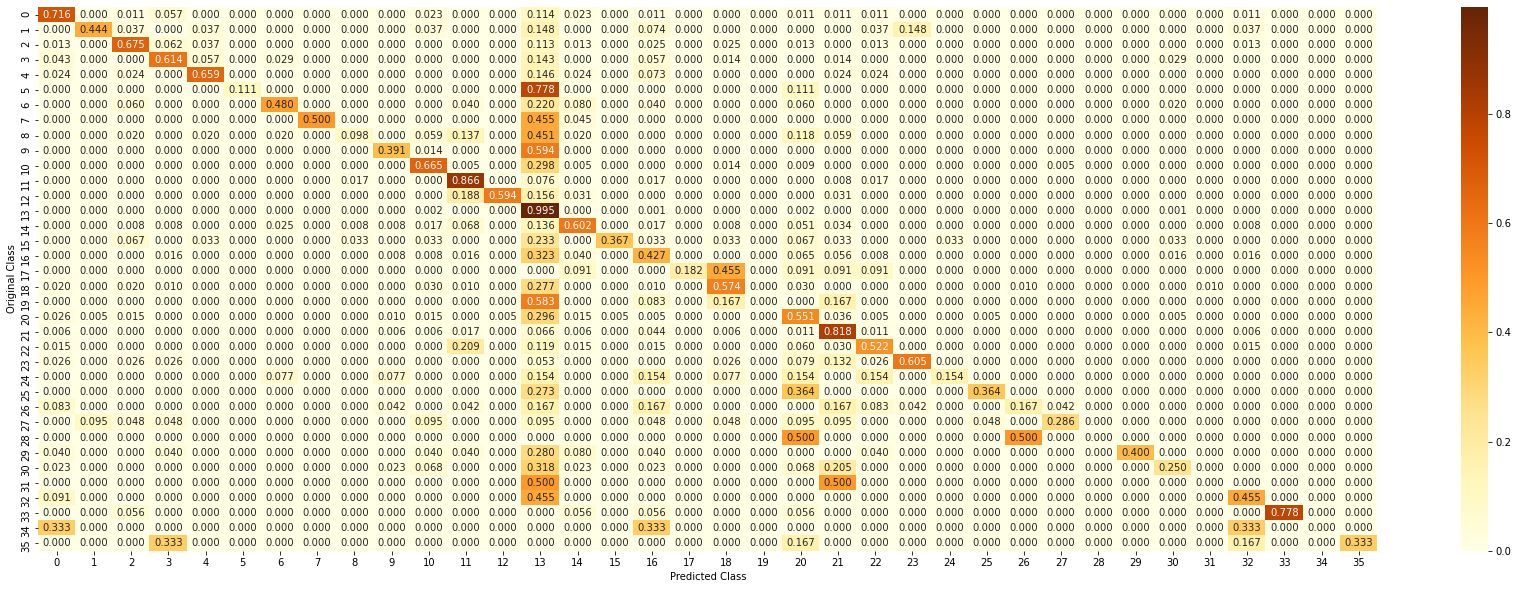

In [128]:
print("*****************RANDOM FOREST**************")
plot_confusion_matrix(y_test.iloc[:,0],rf_pred_df.iloc[:,0])

*****************KNN**************
---------------------------------------- Confusion Matrix ----------------------------------------


<ipython-input-126-b800c016b9c1>:8: RuntimeWarning: invalid value encountered in true_divide
  B =(C/C.sum(axis=0)) #precision_mat


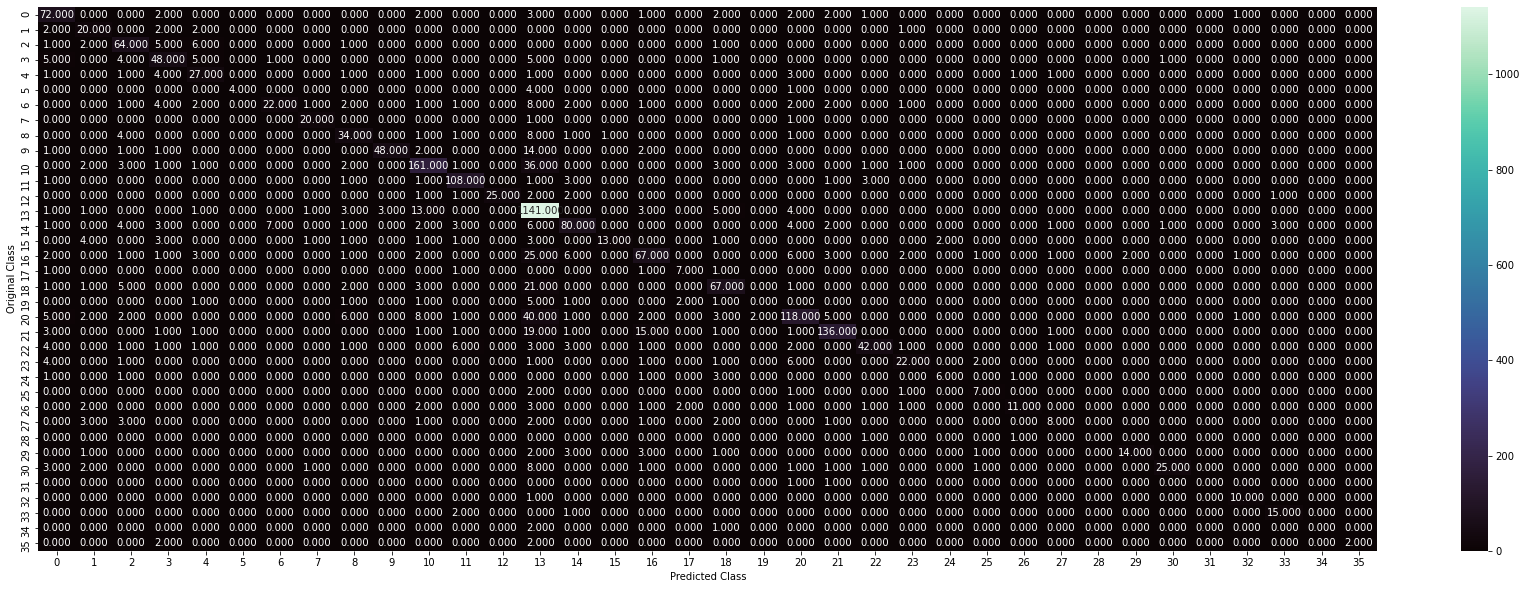

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


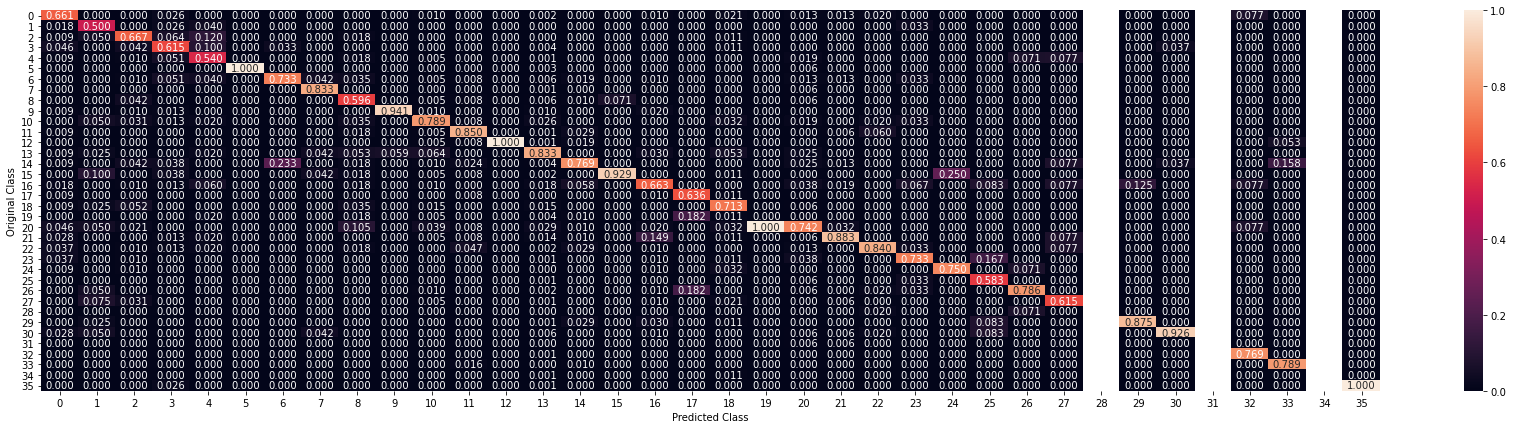

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


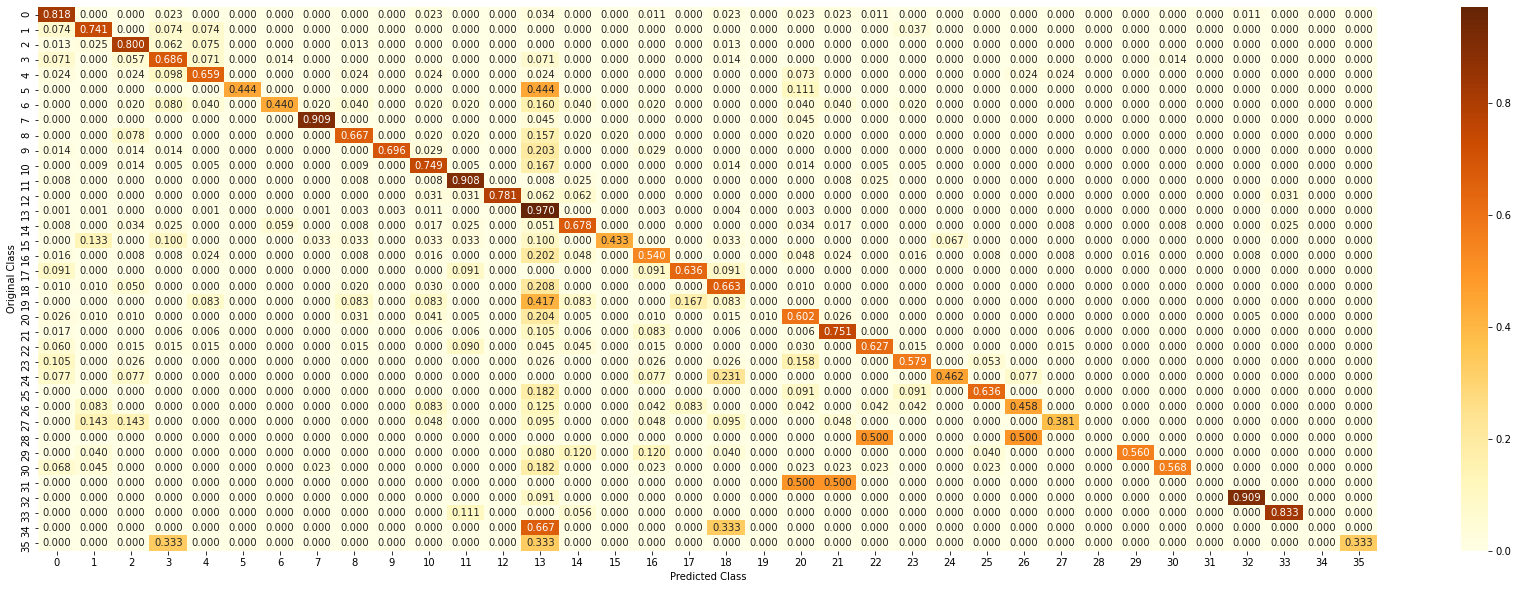

In [129]:
print("*****************KNN**************")
plot_confusion_matrix(y_test.iloc[:,0],knn_pred_df.iloc[:,0])

**************SVM*****************
---------------------------------------- Confusion Matrix ----------------------------------------


<ipython-input-126-b800c016b9c1>:8: RuntimeWarning: invalid value encountered in true_divide
  B =(C/C.sum(axis=0)) #precision_mat


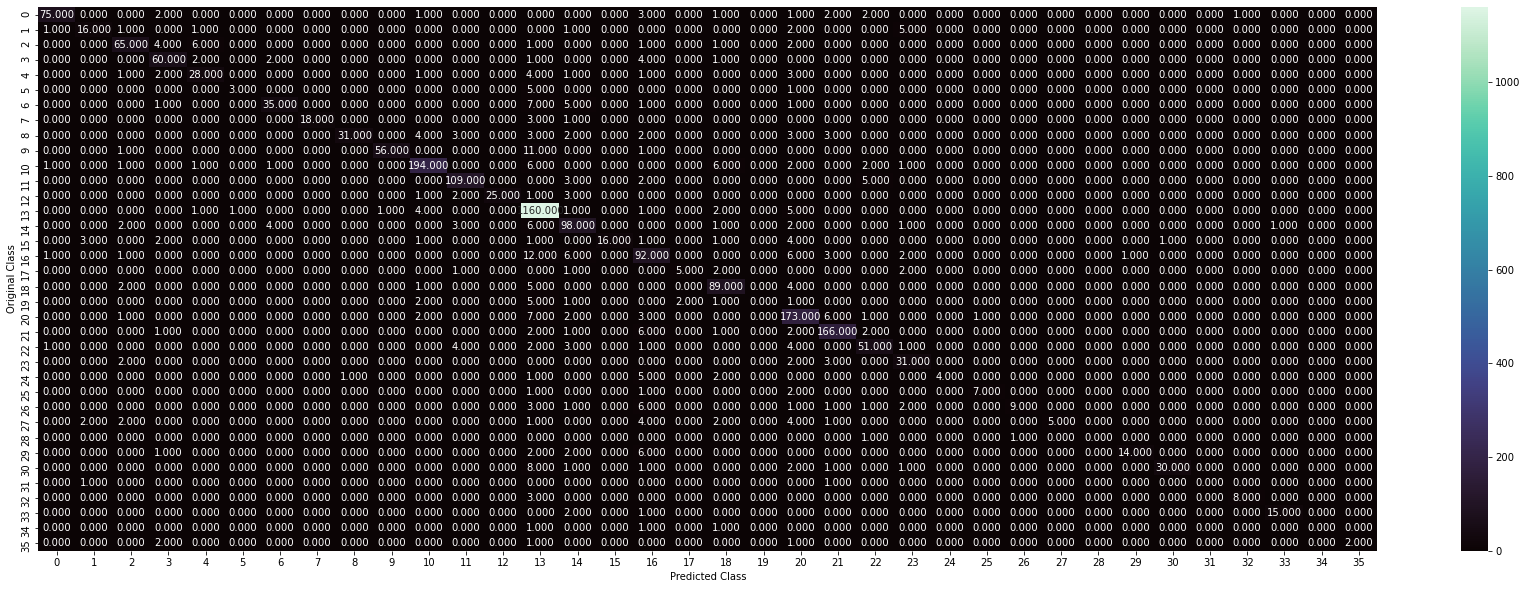

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


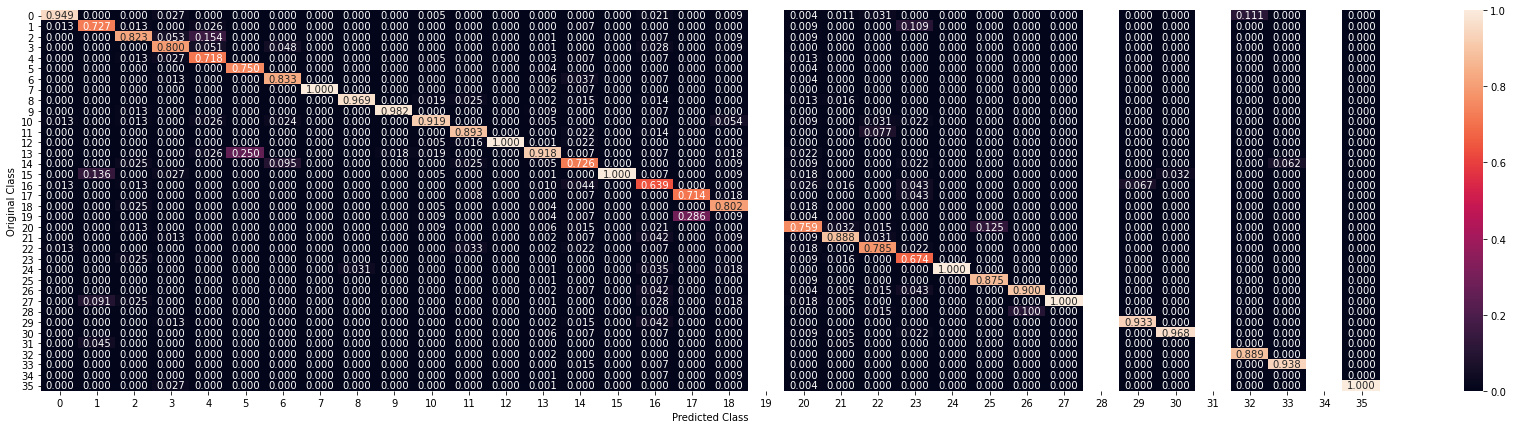

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


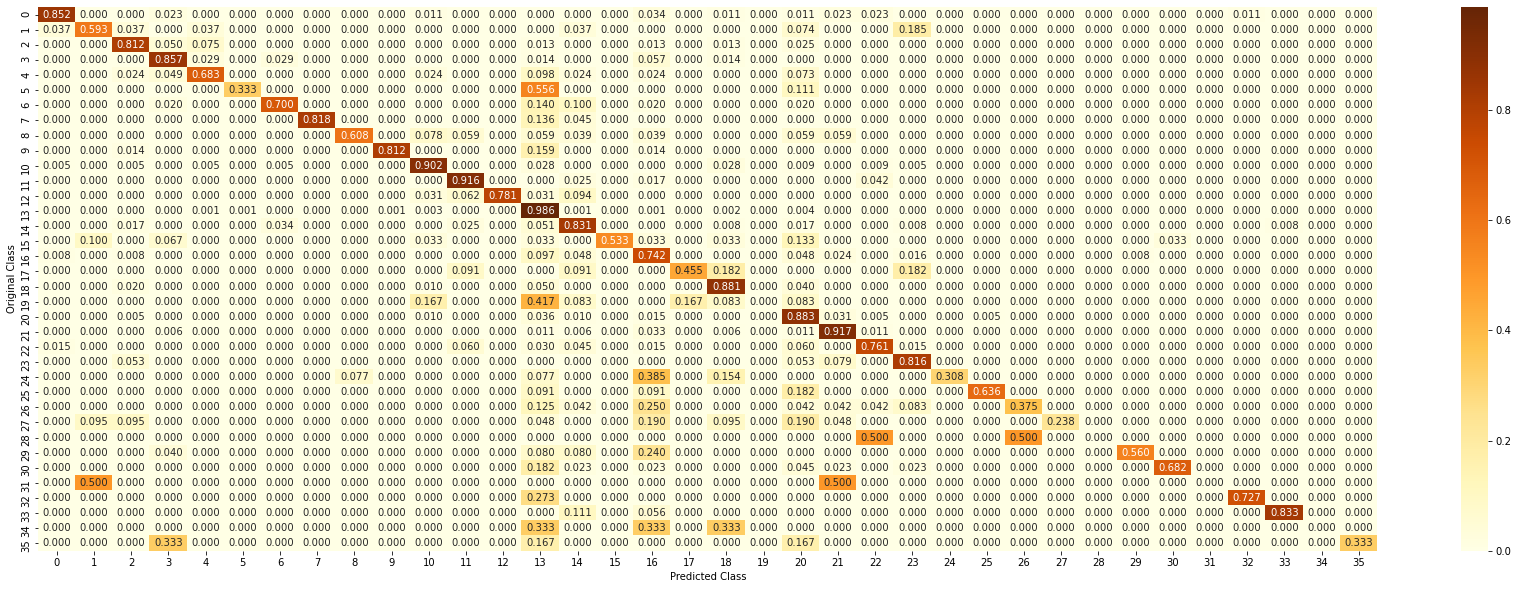

In [130]:
print("**************SVM*****************")
plot_confusion_matrix(y_test.iloc[:,0],svc_pred_df.iloc[:,0])

**************LOGISTIC REGRESSION*****************
---------------------------------------- Confusion Matrix ----------------------------------------


<ipython-input-126-b800c016b9c1>:7: RuntimeWarning: invalid value encountered in true_divide
  A =(((C.T)/(C.sum(axis=1))).T) #recall_mat
<ipython-input-126-b800c016b9c1>:8: RuntimeWarning: invalid value encountered in true_divide
  B =(C/C.sum(axis=0)) #precision_mat


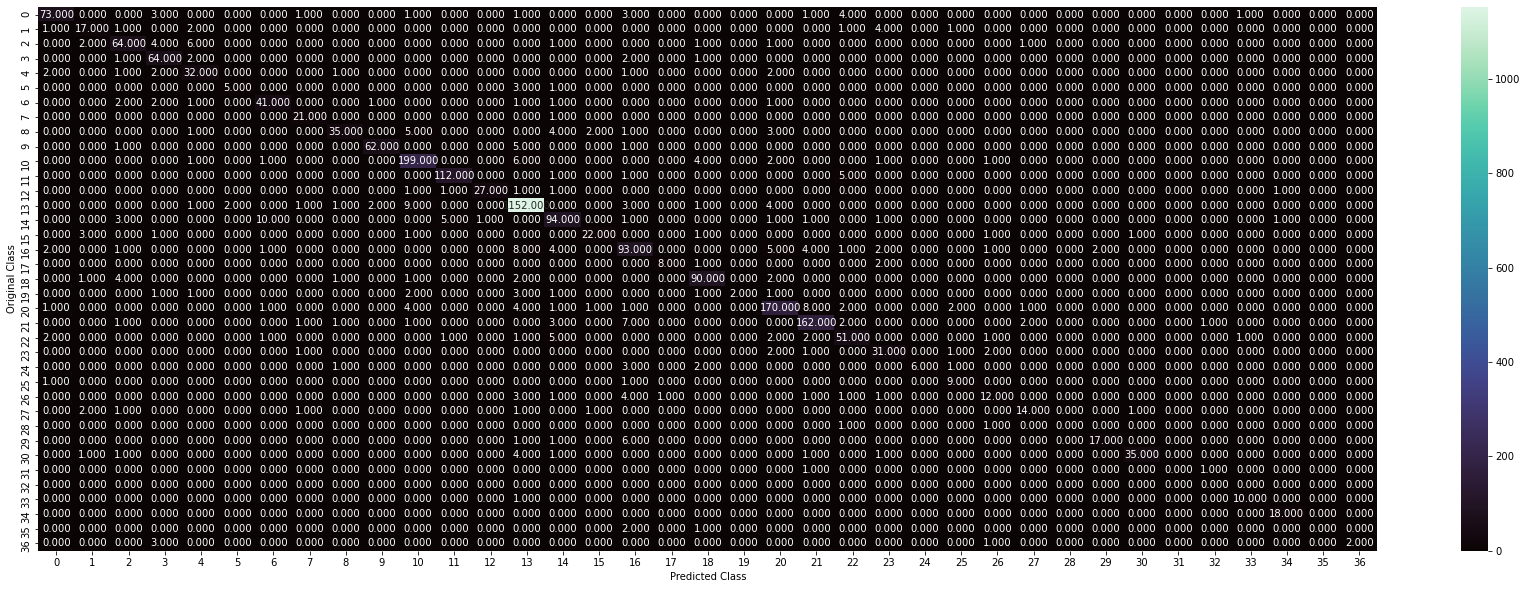

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


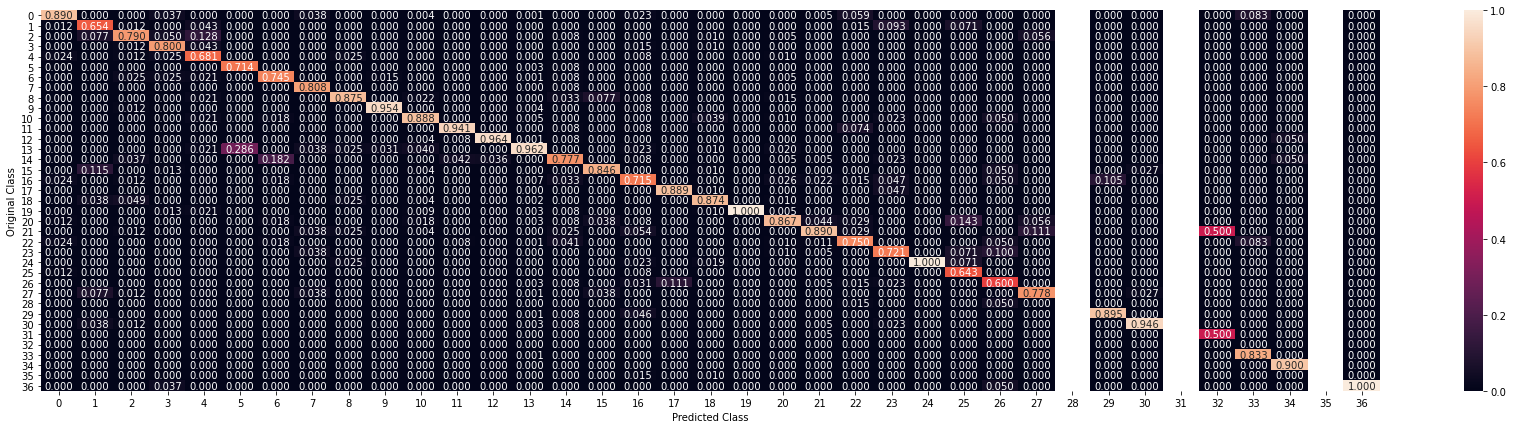

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


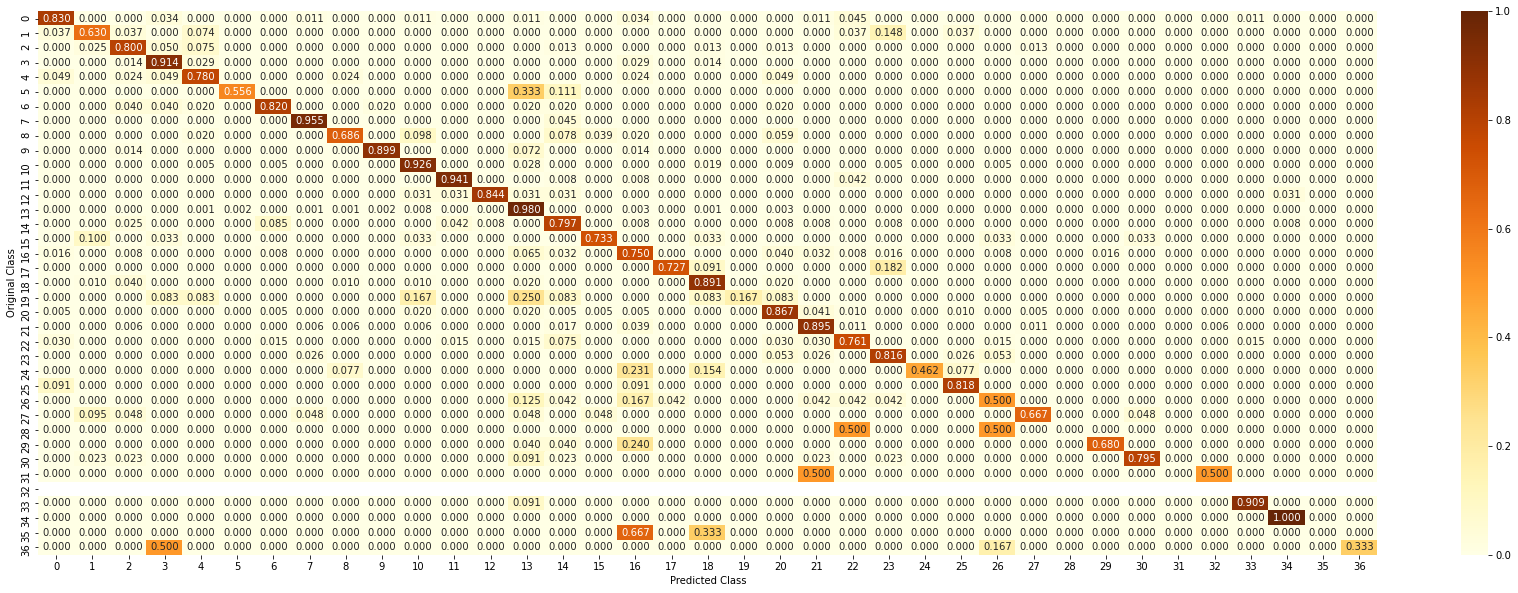

In [131]:
print("**************LOGISTIC REGRESSION*****************")
plot_confusion_matrix(y_test.iloc[:,0],lr_pred_df.iloc[:,0])

**************MULTINOMIAL LOGISTIC REGRESSION*****************
---------------------------------------- Confusion Matrix ----------------------------------------


<ipython-input-126-b800c016b9c1>:7: RuntimeWarning: invalid value encountered in true_divide
  A =(((C.T)/(C.sum(axis=1))).T) #recall_mat
<ipython-input-126-b800c016b9c1>:8: RuntimeWarning: invalid value encountered in true_divide
  B =(C/C.sum(axis=0)) #precision_mat


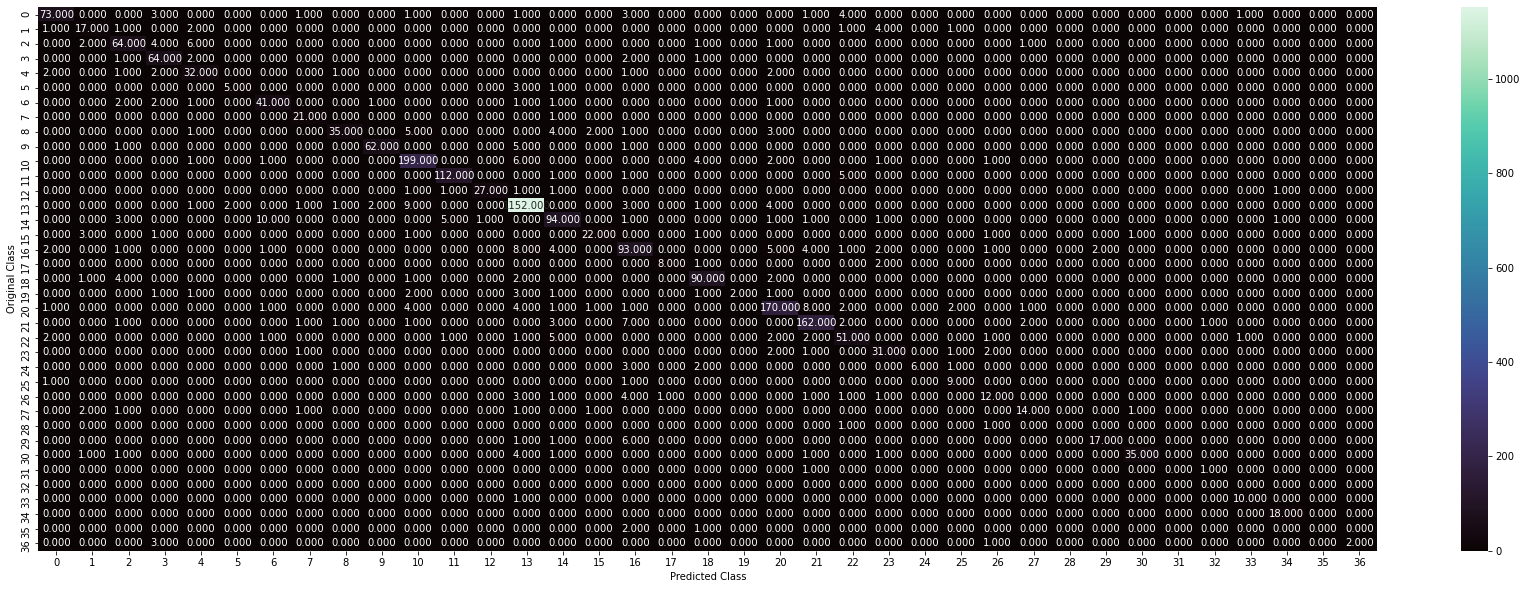

---------------------------------------- Precision Matrix (Columm Sum=1) ----------------------------------------


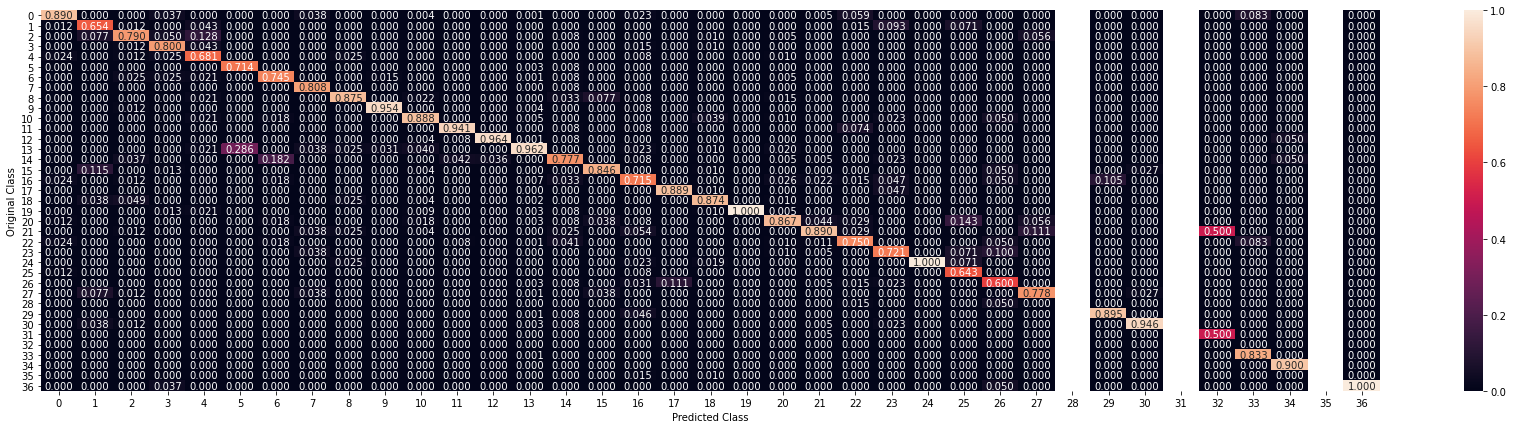

---------------------------------------- Recall Matrix (Row Sum=1) ----------------------------------------


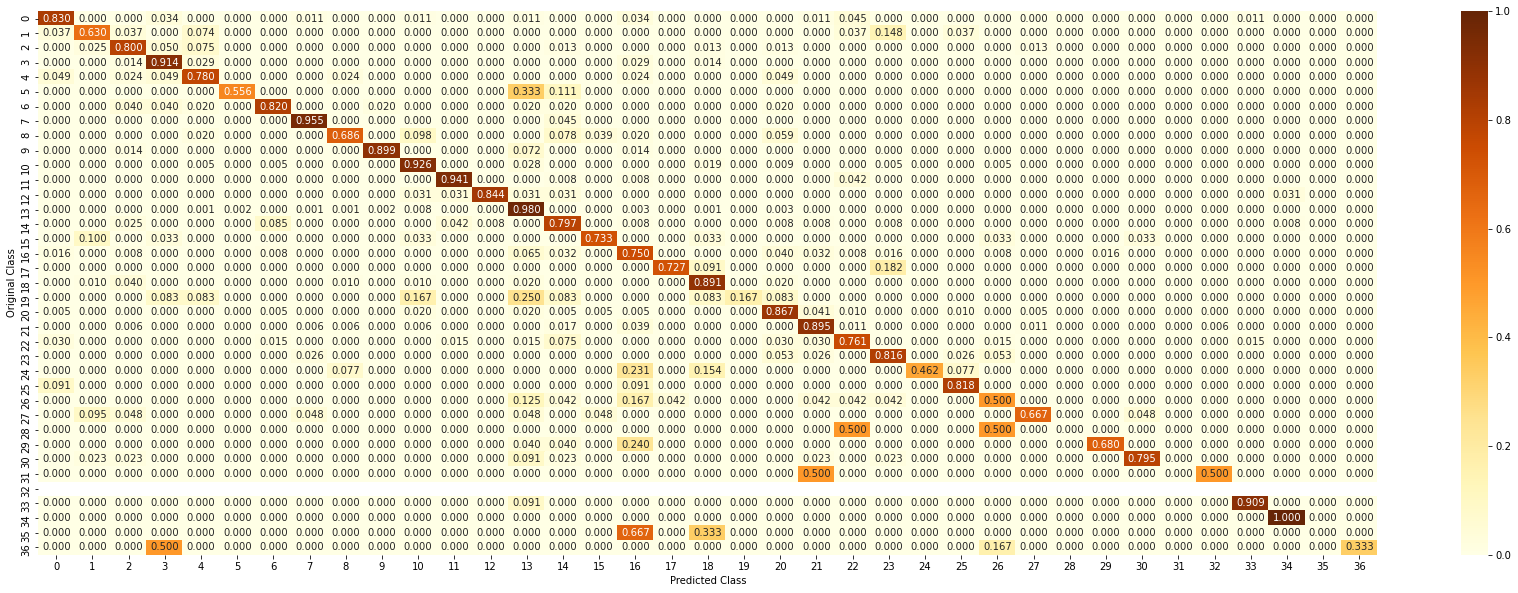

In [132]:
print("**************MULTINOMIAL LOGISTIC REGRESSION*****************")
plot_confusion_matrix(y_test.iloc[:,0],mlr_pred_df.iloc[:,0])

# ******************END******************************